In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [28]:
# Assuming the data is in a string variable called 'data_string'
data = pd.read_csv("/Users/piercedodman/Downloads/CleanDataLong.csv")

In [29]:
data['Main_Agency'] = data['Entity.Empowered'].str.split('-').str[0].str.strip()

In [30]:
# Count frequency of each agency
agency_freq = data['Main_Agency'].value_counts()
min_freq = 5  # Adjust this value to control the minimum frequency threshold
agency_freq = agency_freq[agency_freq >= min_freq]

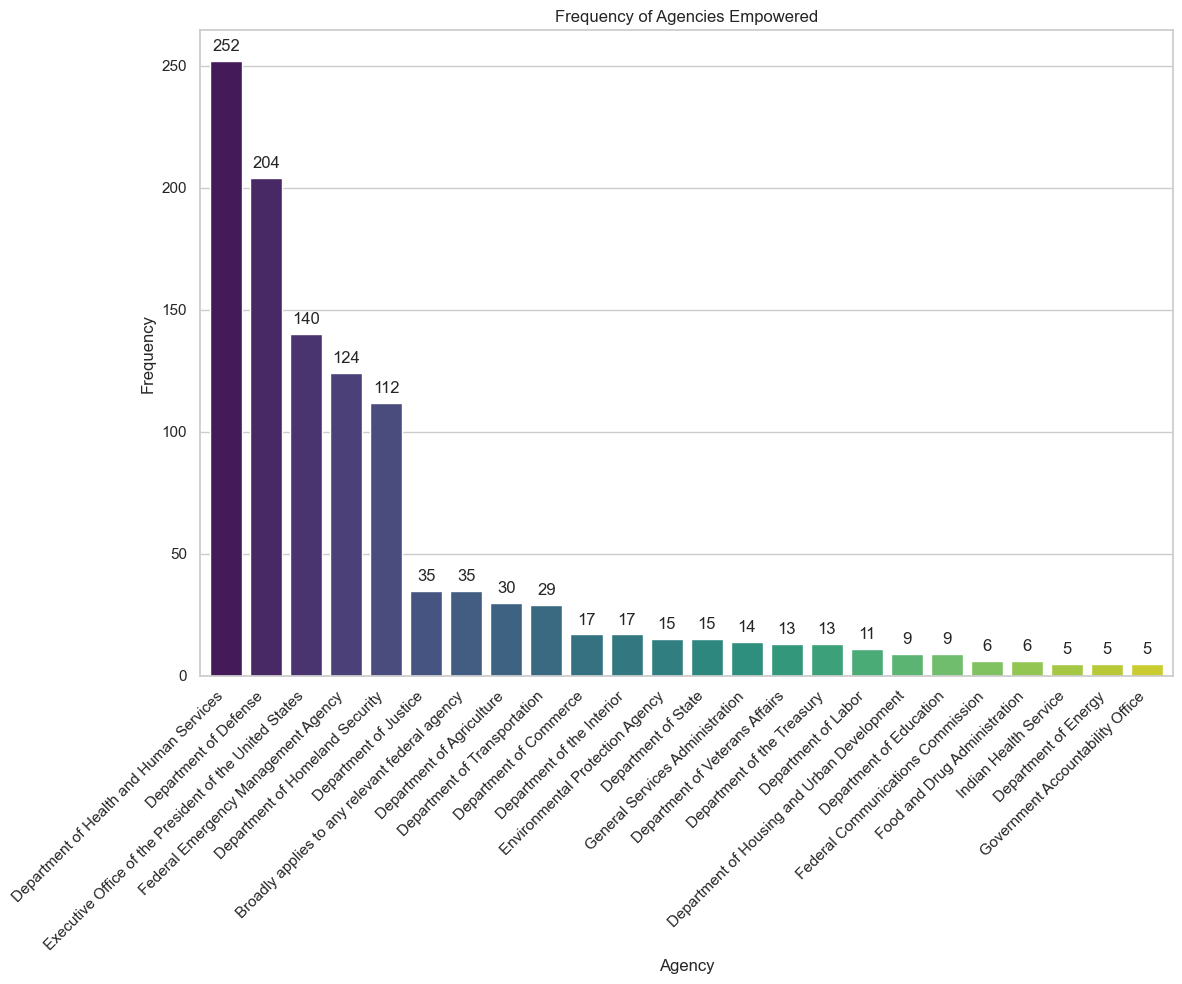

In [31]:
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x=agency_freq.index, y=agency_freq.values, palette="viridis")
plt.title('Frequency of Agencies Empowered')
plt.xlabel('Agency')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)
plt.bar_label(plt.gca().containers[0], padding=5)  # Add labels to the bars with padding
plt.gca().margins(x=0.01)  # Add horizontal spacing between bars
plt.tight_layout()
plt.savefig('/Users/piercedodman/Downloads/Frequencies_of_Agencies_Empowered.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [32]:
# Filter out agencies and document types with low frequency for the stacked bar chart
data['Main_Agency'] = data['Entity.Empowered'].str.split('-').str[0].str.strip()
agency_doc_freq = data.groupby(['Document.Type', 'Main_Agency']).size().unstack()
agency_doc_freq = agency_doc_freq.loc[:, agency_doc_freq.sum() >= min_freq]
agency_doc_freq = agency_doc_freq[agency_doc_freq.sum(axis=1) >= min_freq]

In [33]:
agency_doc_freq['Total'] = agency_doc_freq.sum(axis=1)
agency_doc_freq = agency_doc_freq.sort_values('Total', ascending=False)
agency_doc_freq = agency_doc_freq.drop('Total', axis=1)

<Figure size 1200x2400 with 0 Axes>

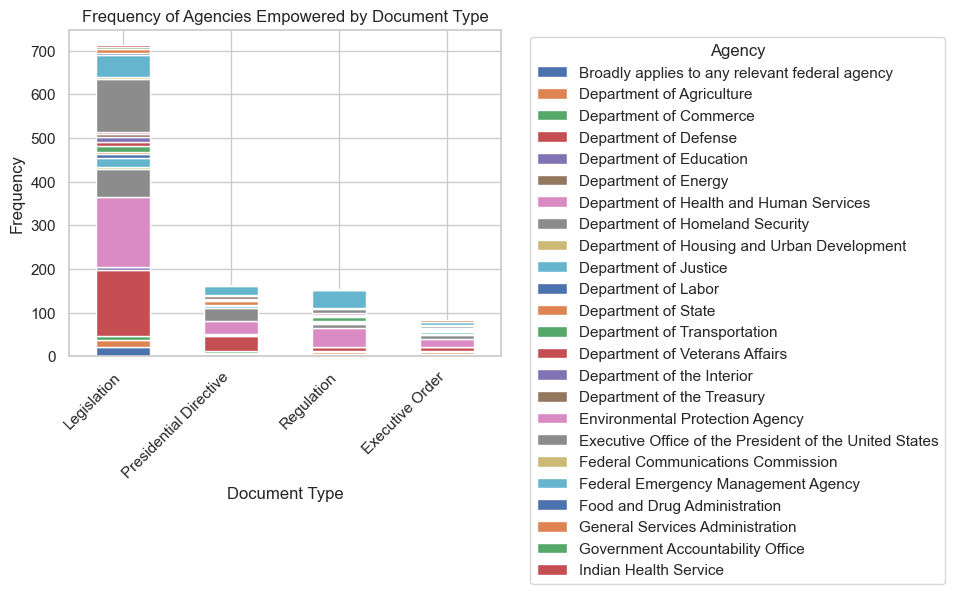

In [35]:
plt.figure(figsize=(12, 24))
agency_doc_freq.plot.bar(stacked=True)
plt.title('Frequency of Agencies Empowered by Document Type')
plt.xlabel('Document Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(bottom=0.2, right=0.8)  # Adjust bottom and right margins
plt.savefig('/Users/piercedodman/Downloads/Frequency_of_Agencies_Empowered_by_Document_Type.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [8]:
# Count the occurrences of each triggering event
event_counts = data['Triggering.Event'].str.split(',', expand=True).stack().value_counts()
filtered_event_counts = event_counts[event_counts >= 5]

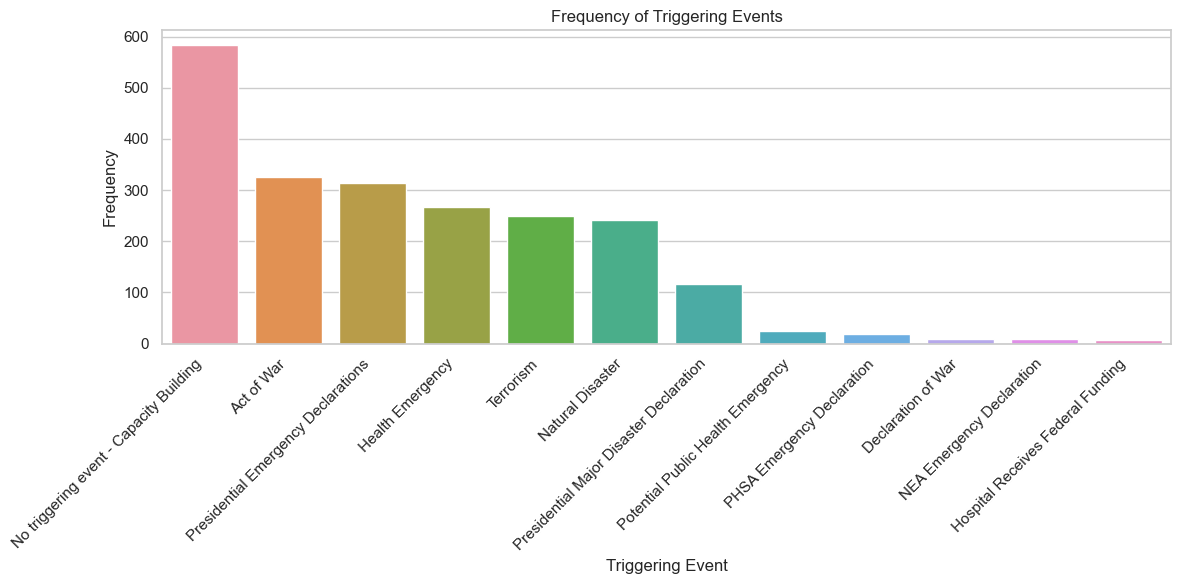

<Figure size 640x480 with 0 Axes>

In [9]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_event_counts.index, y=filtered_event_counts.values)
plt.title('Frequency of Triggering Events')
plt.xlabel('Triggering Event')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('Frequency_of_Triggering_Events.png', dpi=300, bbox_inches='tight')


In [10]:
doc_type_counts = data['Document.Type'].value_counts()

In [11]:
filtered_doc_type_counts = doc_type_counts[doc_type_counts >= 5]

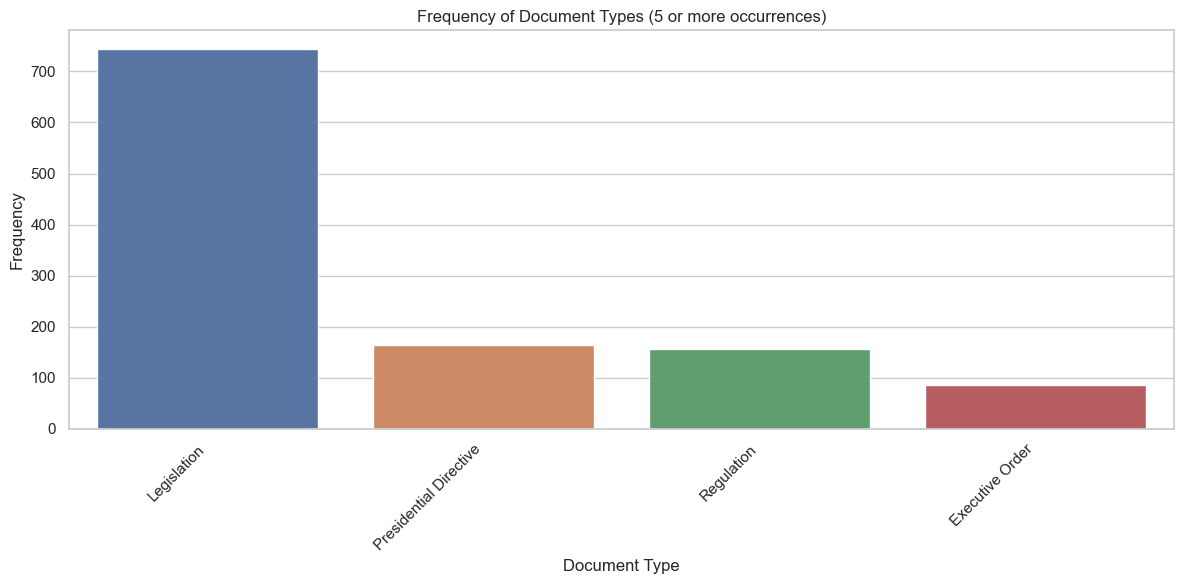

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_doc_type_counts.index, y=filtered_doc_type_counts.values)
plt.title('Frequency of Document Types (5 or more occurrences)')
plt.xlabel('Document Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('Frequency_of_Document_Types.png', dpi=300, bbox_inches='tight')


In [13]:
# Filter for documents that allow military involvement
military_involved = data[data['Military.Involvement..Federal.'].str.contains('Yes', na=False)]

In [14]:
# Create a count of military involvement by document
military_count = military_involved.groupby('Citation')['Military.Involvement..Federal.'].count().sort_values(ascending=False)

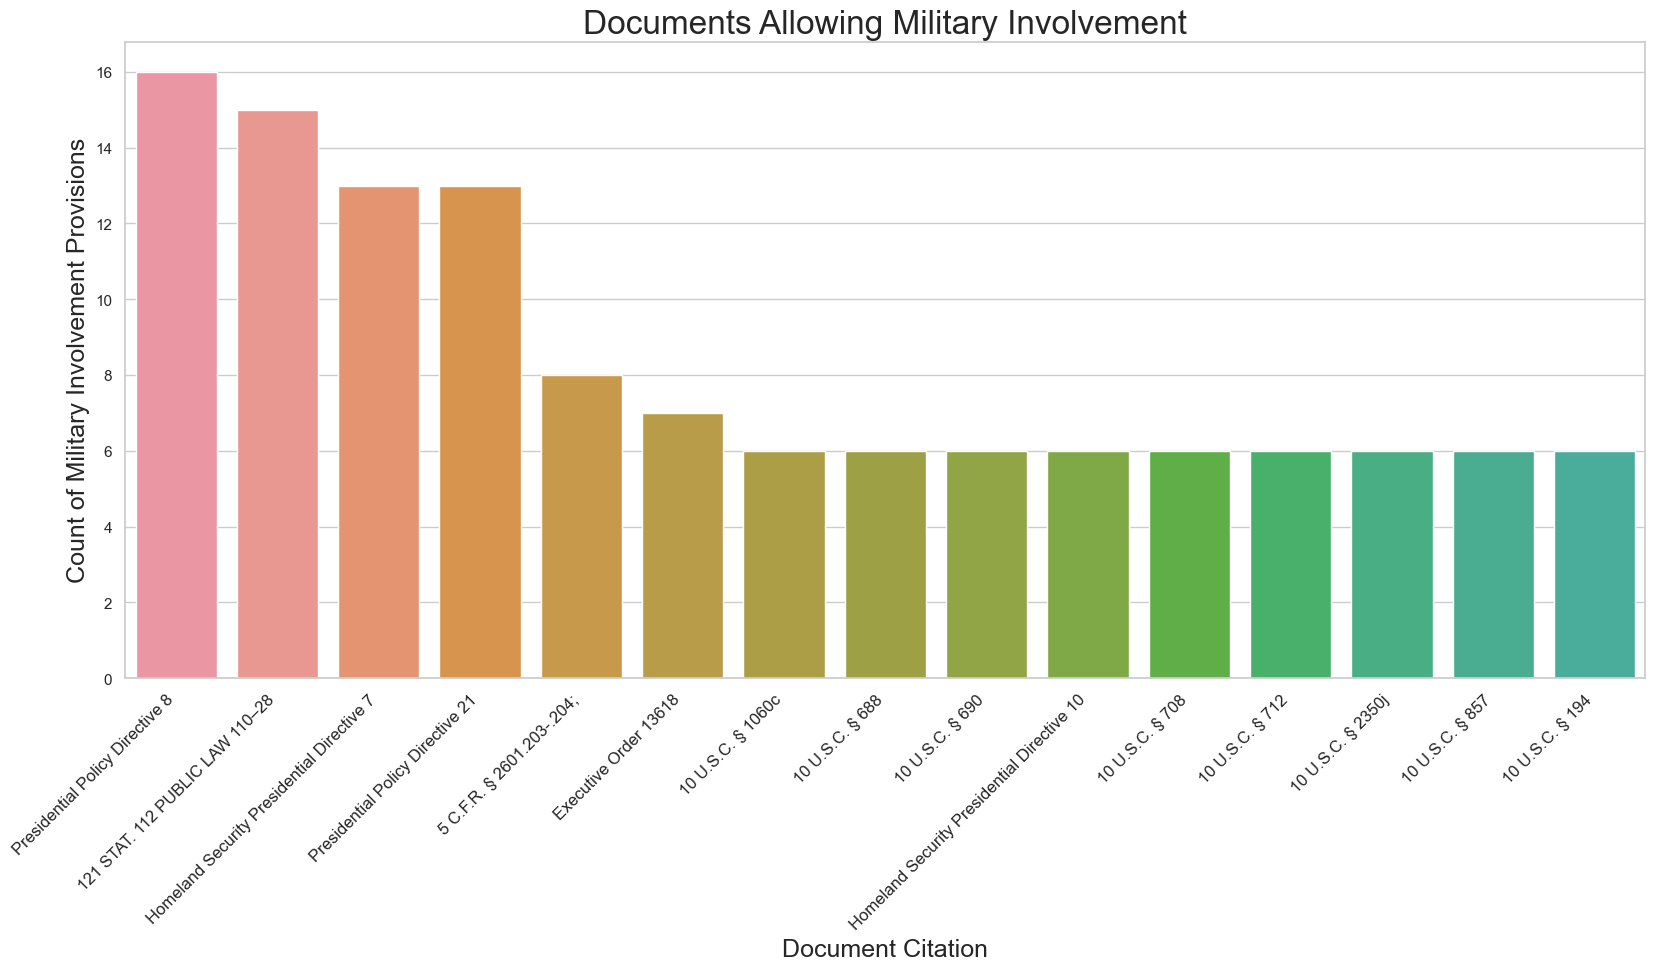

In [15]:
# Filter for documents that allow military involvement
military_involved = data[data['Military.Involvement..Federal.'].str.contains('Yes', na=False)]

# Create a count of military involvement by document
military_count = military_involved.groupby('Citation')['Military.Involvement..Federal.'].count().sort_values(ascending=False)

# Filter for documents with at least one military involvement
military_count = military_count[military_count > 4]

# Create a bar plot
plt.figure(figsize=(17, 16), dpi=100)
ax = sns.barplot(x=military_count.index, y=military_count.values)

plt.title('Documents Allowing Military Involvement', fontsize=24)
plt.xlabel('Document Citation', fontsize=18)
plt.ylabel('Count of Military Involvement Provisions', fontsize=18)

# Rotate x-axis labels and set their alignment
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust the layout to prevent cutting off labels
plt.tight_layout()

# Add value labels on top of each bar
#for i, v in enumerate(military_count.values):
 #   ax.text(i, v, str(v), ha='center', va='bottom', fontsize=14)

# Show only top 15 documents for better readability
plt.xlim(-0.5, 14.5)

plt.savefig('military_involvement_plot.png', dpi=300, bbox_inches='tight')

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


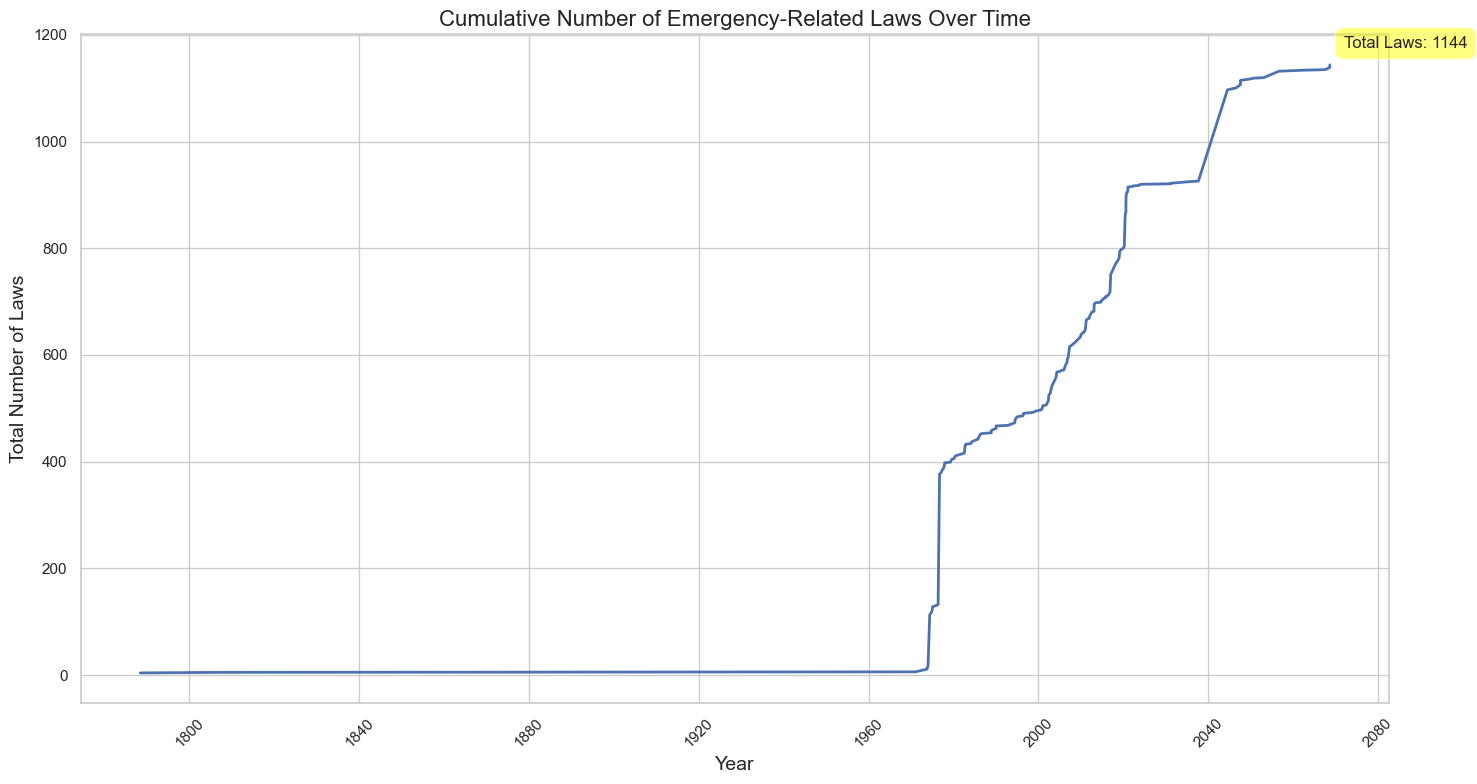

In [16]:
# Function to parse dates flexibly
def parse_date(date_str):
    date_formats = ['%m/%d/%y', '%m/%d/%Y', '%Y-%m-%d', '%d-%m-%Y', '%d/%m/%Y']
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return pd.NaT

# Convert date column to datetime
data['Date.Originally.Published..from.File.'] = data['Date.Originally.Published..from.File.'].apply(parse_date)

# Remove rows with invalid dates
data = data.dropna(subset=['Date.Originally.Published..from.File.'])

# Sort by date
data = data.sort_values('Date.Originally.Published..from.File.')

# Create a timeline of document publications
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# Create a cumulative sum plot
cumulative_laws = data['Date.Originally.Published..from.File.'].value_counts().sort_index().cumsum()
sns.lineplot(x=cumulative_laws.index, y=cumulative_laws.values, linewidth=2)

plt.title('Cumulative Number of Emergency-Related Laws Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Laws', fontsize=14)
plt.xticks(rotation=45)

# Annotate the total number of laws at the end of the timeline
total_laws = cumulative_laws.iloc[-1]
plt.annotate(f'Total Laws: {total_laws}', 
             xy=(cumulative_laws.index[-1], total_laws), 
             xytext=(10, 10), 
             textcoords='offset points', 
             ha='left', 
             va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             fontsize=12)

plt.tight_layout()

# Display the plot (if running in an interactive environment)
plt.show()